In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
df.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [6]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [7]:
df.drop_duplicates(inplace=True)


In [8]:
df.shape

(96146, 9)

In [9]:
df['diabetes'].value_counts()

diabetes
0    87664
1     8482
Name: count, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [12]:
# the columns to encode
categorical_features = ['gender', 'smoking_history',]

# create an empty dictionary to store the original text and encoded number
encoded_value_map = {}
for col in categorical_features:
  df[col] = le.fit_transform(df[col])
  # classes_ is an attribute in scikit-learn classifiers(logistic reg, randomforest clas, etc) that stores the unique class labels
  # the mpdel was trained with e.g ([female, male])
  # range(len(le.classes_)) gives the encoded numbers (0,1,2)
  # zip() is a python built-in function that combines two or more iterables element by element ('female' : 0, 'male' : 1)
  encoded_value_map[col] = dict(zip(le.classes_, range(len(le.classes_))))

print("Encoded value mappings:")
for col, mapping in encoded_value_map.items():
  print(f"Column '{col}': {mapping}")

Encoded value mappings:
Column 'gender': {'Female': 0, 'Male': 1, 'Other': 2}
Column 'smoking_history': {'No Info': 0, 'current': 1, 'ever': 2, 'former': 3, 'never': 4, 'not current': 5}


In [13]:
df.gender.unique()

array([0, 1, 2])

In [14]:
df.smoking_history.unique()

array([4, 0, 1, 3, 2, 5])

In [15]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


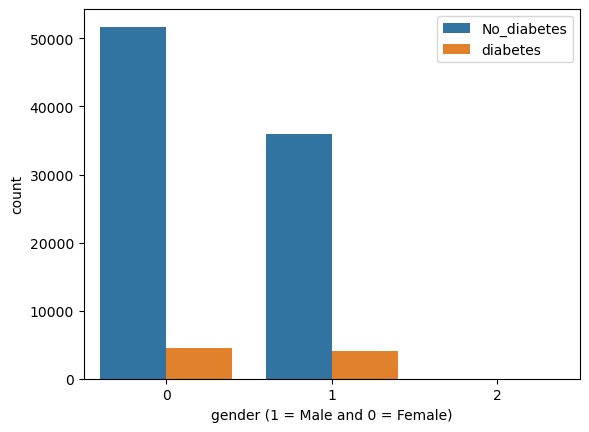

In [16]:
sns.countplot(x='gender',hue='diabetes',data=df)
plt.xlabel('gender (1 = Male and 0 = Female)')
plt.legend(["No_diabetes", "diabetes"])

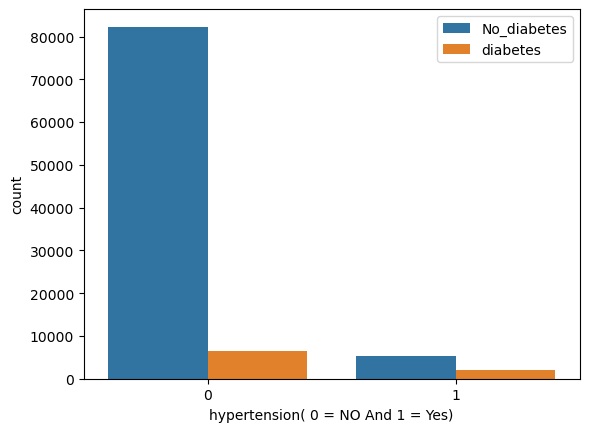

In [17]:
sns.countplot(x='hypertension',hue='diabetes',data=df)
plt.xlabel('hypertension( 0 = NO And 1 = Yes)')
plt.legend(["No_diabetes", "diabetes"])

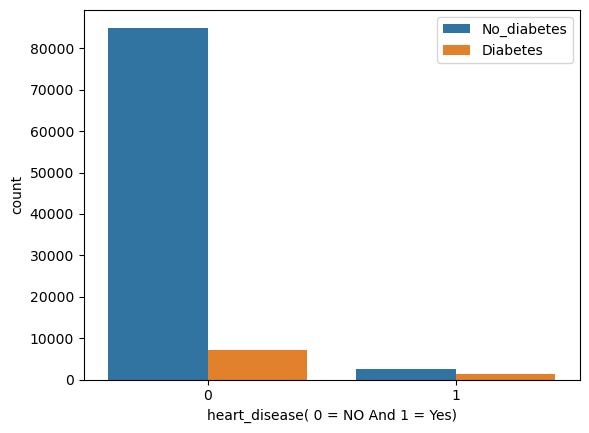

In [18]:
sns.countplot(x='heart_disease',hue='diabetes',data=df)
plt.xlabel('heart_disease( 0 = NO And 1 = Yes)')
plt.legend(["No_diabetes", "Diabetes"])

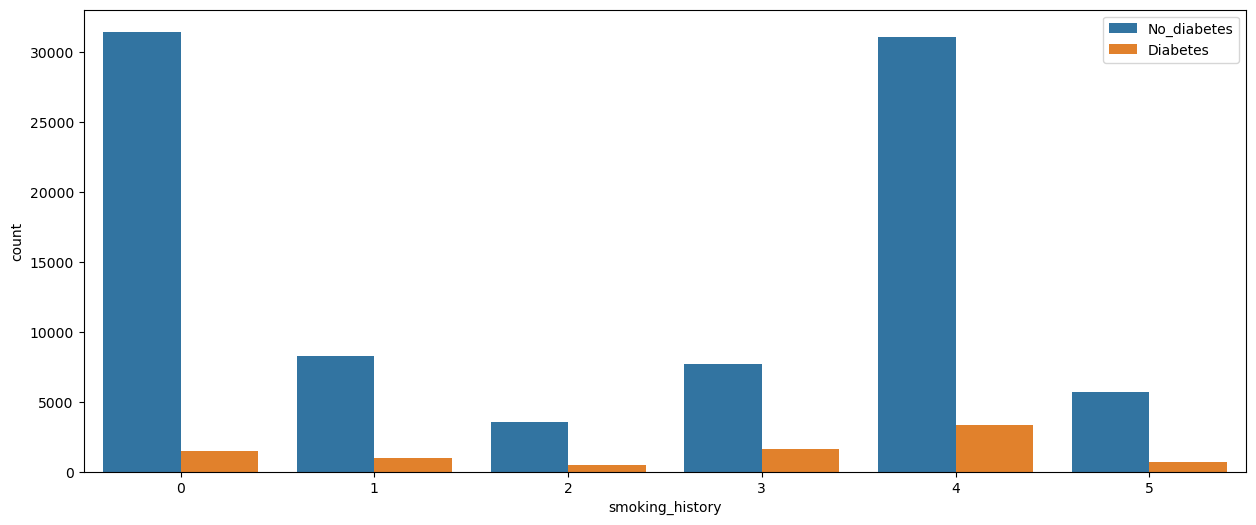

In [19]:
plt.figure(figsize=(15,6))
sns.countplot(x='smoking_history',hue='diabetes',data=df)
plt.legend(["No_diabetes", "Diabetes"])

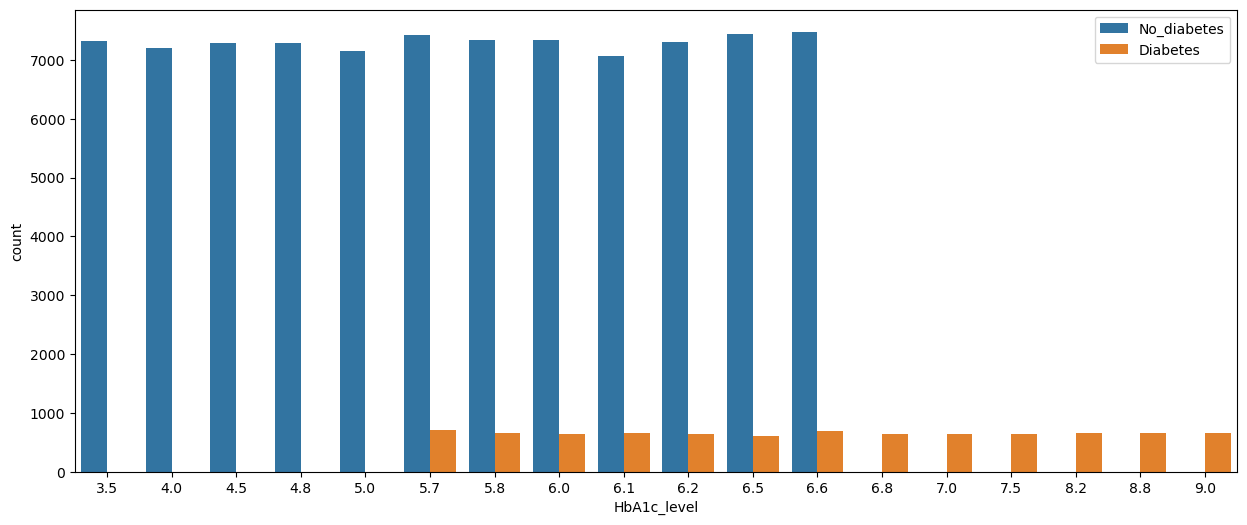

In [20]:
plt.figure(figsize=(15,6))
sns.countplot(x='HbA1c_level',hue='diabetes',data=df)
plt.legend(["No_diabetes", "Diabetes"])

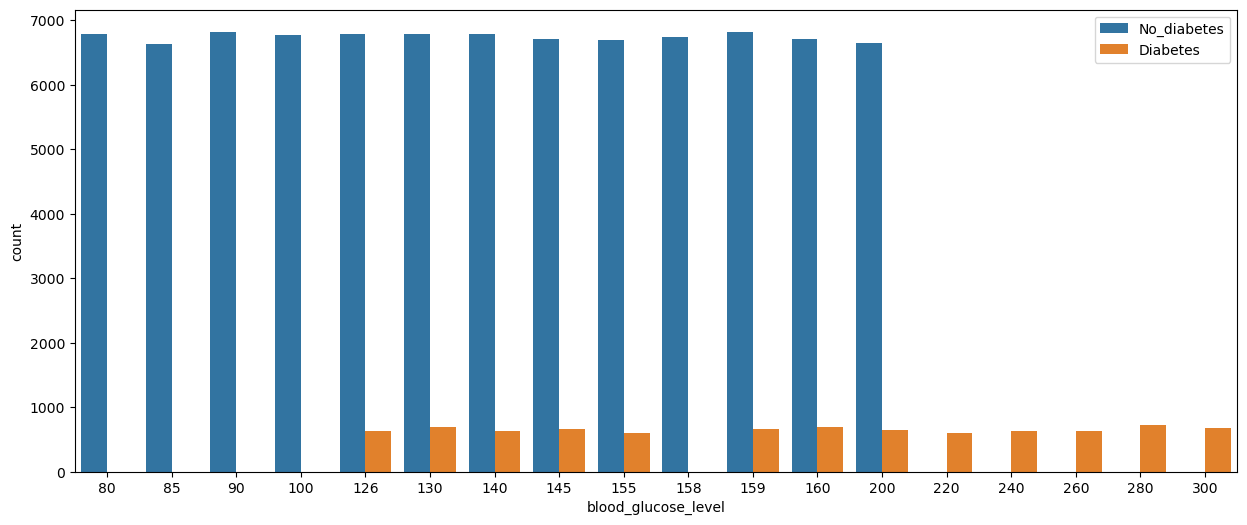

In [21]:
plt.figure(figsize=(15,6))
sns.countplot(x='blood_glucose_level',hue='diabetes',data=df)
plt.legend(["No_diabetes", "Diabetes"])

In [22]:
df.corr()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,-0.028968,0.014007,0.078312,-0.079239,-0.023461,0.019836,0.017830,0.037613
age,-0.028968,1.000000,0.257305,0.238451,0.241128,0.344797,0.106719,0.114317,0.264927
hypertension,0.014007,0.257305,1.000000,0.119982,0.087892,0.148111,0.081441,0.084834,0.195710
heart_disease,0.078312,0.238451,0.119982,1.000000,0.023608,0.061376,0.068140,0.070832,0.170711
smoking_history,-0.079239,0.241128,0.087892,0.023608,1.000000,0.183840,0.035518,0.038259,0.088471
bmi,-0.023461,0.344797,0.148111,0.061376,0.183840,1.000000,0.084423,0.092543,0.214932
HbA1c_level,0.019836,0.106719,0.081441,0.068140,0.035518,0.084423,1.000000,0.171615,0.406408
blood_glucose_level,0.017830,0.114317,0.084834,0.070832,0.038259,0.092543,0.171615,1.000000,0.424336
diabetes,0.037613,0.264927,0.195710,0.170711,0.088471,0.214932,0.406408,0.424336,1.000000


<Axes: >

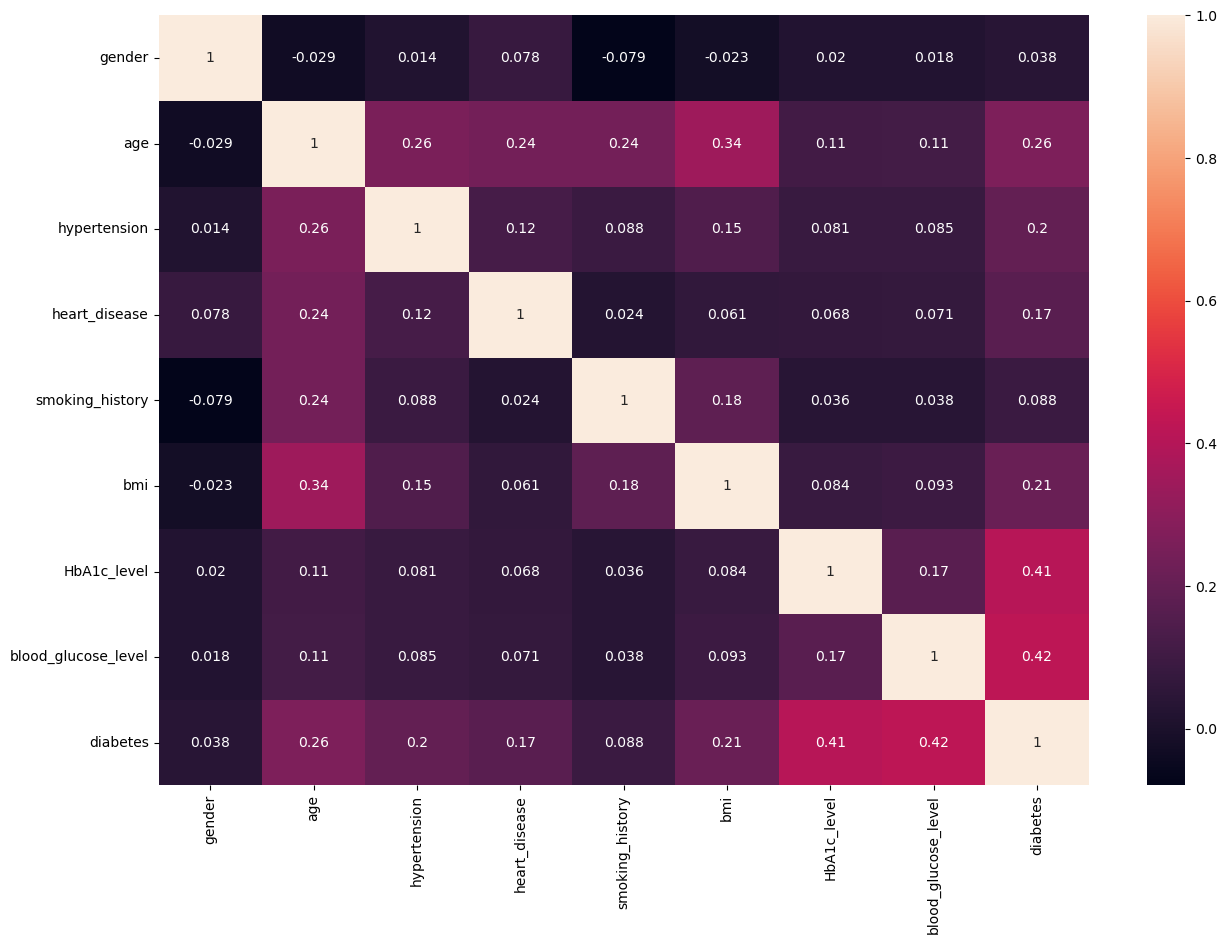

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot = True )

In [24]:
x=df.drop('diabetes',axis=1)
y=df["diabetes"]

In [25]:
print(x.shape, y.shape)

(96146, 8) (96146,)


In [26]:
from imblearn.combine import SMOTETomek
sm=SMOTETomek(random_state=42)

In [27]:
X,Y=sm.fit_resample(x,y)

In [28]:
print(X.shape, Y.shape, Y.value_counts())

(174544, 8) (174544,) diabetes
0    87272
1    87272
Name: count, dtype: int64


In [29]:
#using ksplits to train and test my model multiple times on different parts of the data
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [30]:
results = []
#kf.split(X) gives back train and test row indexex for each fold, it tells you which rows go into training and testing
for train_index, test_index in kf.split(X):
    #iloc selects those rows from the features and target using the train_index and test_index
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

In [31]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(139636, 8) (139636,) (34908, 8) (34908,)


In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [34]:
y_pred = model.predict(X_test)

In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.9750314969648379
Recall: 0.9763734373207936
F1-Score: 0.975702005730659


In [36]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     17470
           1       0.98      0.98      0.98     17438

    accuracy                           0.98     34908
   macro avg       0.98      0.98      0.98     34908
weighted avg       0.98      0.98      0.98     34908



In [37]:
from sklearn.metrics import classification_report
import pandas as pd

# Assuming you have Y_test and y_pred
report_dict = classification_report(Y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

report_df.style.background_gradient(cmap='Blues')


,precision,recall,f1-score,support
0,0.976384,0.975043,0.975713,17470.000000
1,0.975031,0.976373,0.975702,17438.000000
accuracy,0.975708,0.975708,0.975708,0.975708
macro avg,0.975708,0.975708,0.975708,34908.000000
weighted avg,0.975709,0.975708,0.975708,34908.000000


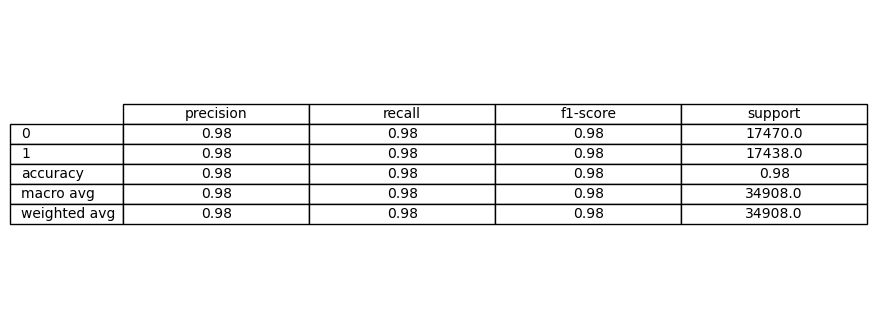

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report

# If not already available
report_dict = classification_report(Y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# Plot and save
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('tight')
ax.axis('off')
table = ax.table(
    cellText=report_df.round(2).values,
    colLabels=report_df.columns,
    rowLabels=report_df.index,
    cellLoc='center',
    loc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

plt.savefig("assets/images/classification_report.png", bbox_inches="tight")


In [39]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[17034   436]
 [  412 17026]]


In [40]:
from sklearn.linear_model import LogisticRegression

model2 = LogisticRegression(penalty='l2', C=1.0, max_iter=200)

In [41]:
model2.fit(X_train, Y_train)

LogisticRegression(max_iter=200)

In [42]:
y_pred2 = model2.predict(X_test)

In [43]:
precision = precision_score(Y_test, y_pred2)
recall = recall_score(Y_test, y_pred2)
f1 = f1_score(Y_test, y_pred2)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.8871317652432062
Recall: 0.8910998967771533
F1-Score: 0.8891114035589632


In [44]:
cm = confusion_matrix(Y_test, y_pred2)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[15493  1977]
 [ 1899 15539]]


In [45]:
# this function helps turn user input into a dataframe
def make_prediction(gender, age, hypertension, heart_disease, smoking_history, bmi, HbA1c_level, blood_glucose_level):
    data = {
        'gender':gender,
        'age':age,
        'hypertension':hypertension,
        'heart_disease':heart_disease,
        'smoking_history':smoking_history,
        'bmi':bmi,
        'HbA1c_level':HbA1c_level,
        'blood_glucose_level':blood_glucose_level,
    }
    df = pd.DataFrame(data, index=[0])
    prediction = model.predict(df)
    return f"Person with the following result: {prediction} (1 person is mostly likely to have diabetes, 0 person is not most likely to have diabetes"

In [46]:
make_prediction(0, 44, 0, 0, 4, 19.31, 6.5, 200)

'Person with the following result: [1] (1 person is mostly likely to have diabetes, 0 person is not most likely to have diabetes'

In [47]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [48]:
import joblib
joblib.dump(model, 'model.pkl', compress=3)


['model.pkl']

In [49]:
make_prediction(1, 73, 0, 0, 3, 25.91, 9, 160)

'Person with the following result: [1] (1 person is mostly likely to have diabetes, 0 person is not most likely to have diabetes'